In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('train_binary.csv')
df.head()

,imagesID,label
0,26bcc93ff.jpg,0
1,1d7fb0fa8.jpg,0
2,94dac8944.jpg,0
3,b18d448a7.jpg,0
4,08ba29346.jpg,0


In [5]:
df.shape

(12568, 2)

In [6]:
import cv2

train_paths = "train_images/"

def load_images(image_paths,df):
    loadedImages = []
    
    for img in df.imagesID:
        image = cv2.imread(train_paths+img)
        loadedImages.append(image)
    return loadedImages

train_images = load_images(train_paths,df)

(256, 1600, 3)


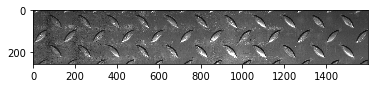

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
print(train_images[100].shape)
plt.imshow(train_images[0])

In [7]:
def resize_images(images):
    resizedimages = []  
    for img in images:  
        img = cv2.resize(img,(256,img.shape[0]))
        resizedimages.append(img)
    return resizedimages

train_images_r = resize_images(train_images)

(256, 256, 3)


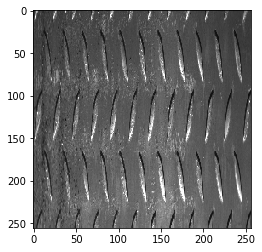

In [10]:
print(train_images_r[0].shape)
plt.imshow(train_images_r[0])

In [8]:

def features_to_np_array(images):
    imagenp = np.empty(shape = (len(images),images[0].shape[0],images[0].shape[1],images[0].shape[2]), dtype='uint8')
    idx = 0
    for img in images:
        imagenp[idx,:,:,:] = img[:,:,:]
        idx = idx+1
    imagenp = imagenp.reshape((imagenp.shape[0],imagenp.shape[1]*imagenp.shape[2]*imagenp.shape[3]))
    return imagenp
    
    
train_images = features_to_np_array(train_images_r)

In [9]:
train_images.shape

(12568, 196608)

In [10]:
y = pd.get_dummies(df.label,columns='label')
y = np.array(y)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_images,y,test_size = 0.2,random_state=42, stratify=y)
X_train.shape

(10054, 196608)

In [12]:
X_train_r = X_train.reshape((10054,256,256,3))
X_train_r.shape

(10054, 256, 256, 3)

In [15]:
X_test_r.shape

(2514, 256, 256, 3)

In [14]:
X_test_r = X_test.reshape((2514,256,256,3))
X_test_r.shape


(2514, 256, 256, 3)

In [16]:
import tensorflow as tf
import random as rn

# Set up your models here
# Setting the seed for numpy-generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the graph-level random seed.
tf.random.set_seed(89)

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D

model = Sequential()
#model_28.add(Dense(128,input_dim = 784,activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), input_shape= (256,256,3), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, 3, 3, activation='relu', border_mode='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), input_shape=(256, 256,..., activation="relu", padding="same")`
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", padding="same")`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 256)      

In [17]:
model.fit(X_train_r,y_train,epochs=15,batch_size=128, validation_data = (X_test_r, y_test))

Train on 10054 samples, validate on 2514 samples
Epoch 1/15
10054/10054 [==============================] - 1915s 190ms/step - loss: 4.0791 - accuracy: 0.6651 - val_loss: 0.4629 - val_accuracy: 0.7768
Epoch 2/15
10054/10054 [==============================] - 2148s 214ms/step - loss: 0.4358 - accuracy: 0.7890 - val_loss: 0.4341 - val_accuracy: 0.7894
Epoch 3/15
10054/10054 [==============================] - 2233s 222ms/step - loss: 0.4011 - accuracy: 0.8085 - val_loss: 0.3878 - val_accuracy: 0.8111
Epoch 4/15
10054/10054 [==============================] - 2057s 205ms/step - loss: 0.3618 - accuracy: 0.8322 - val_loss: 0.4131 - val_accuracy: 0.8035
Epoch 5/15
10054/10054 [==============================] - 2101s 209ms/step - loss: 0.3429 - accuracy: 0.8379 - val_loss: 0.3667 - val_accuracy: 0.8391
Epoch 6/15
10054/10054 [==============================] - 2113s 210ms/step - loss: 0.3133 - accuracy: 0.8604 - val_loss: 0.3456 - val_accuracy: 0.8526
Epoch 7/15
10054/10054 [=====================

In [18]:
 model.save("Binary2.h5")

In [19]:
history = model.load_weights("Binary2.h5")

In [34]:
X_test_r.shape

(2514, 256, 256, 3)

In [36]:
y_train.shape

(10054, 2)

In [26]:
from keras.models import load_model
 
# load model
hist1 = load_model('Binary2.h5')

In [38]:
y_pred=model.predict(X_test_r)


In [23]:
import matplotlib.pyplot as plt

In [37]:
y_pred.shape

(2514, 2)

In [ ]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

In [39]:

def convert_class(y):
    
    lb_list = []
    
    for i in y:
        
        i = list(i)
        
        i_mx = max(i)
        
        i_id = i.index(i_mx)
        
        lb_list.append(i_id)
        
    return np.array(lb_list)

In [41]:
y_test =  convert_class(y_test)
y_pred = convert_class(y_pred)

In [42]:
y_test.shape

(2514,)

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [45]:
print(confusion_matrix(y_test, y_pred))

[[1039  142]
 [ 181 1152]]


In [47]:
print(classification_report(y_test, y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1181
           1       0.89      0.86      0.88      1333

    accuracy                           0.87      2514
   macro avg       0.87      0.87      0.87      2514
weighted avg       0.87      0.87      0.87      2514



In [48]:
print(accuracy_score(y_test, y_pred))

0.8715194908512331


In [81]:
 df2 = pd.read_excel( 'Book.xlsx')

In [57]:
import xlrd

In [82]:
df2.head

<bound method NDFrame.head of     Training loss  Validation loss  Validation Accuracy  Training Accuracy
0          4.0791           0.4629               0.7768             0.6651
1          0.4358           0.4341               0.7894             0.7890
2          0.4011           0.3878               0.8111             0.8085
3          0.3618           0.4131               0.8035             0.8322
4          0.3429           0.3667               0.8391             0.8379
5          0.3133           0.3456               0.8526             0.8604
6          0.2769           0.2771               0.8730             0.8743
7          0.2568           0.3341               0.8663             0.8860
8          0.2441           0.3562               0.8550             0.8930
9          0.2383           0.3297               0.8677             0.8963
10         0.2144           0.3851               0.8656             0.9087
11         0.2028           0.4054               0.8367             0.

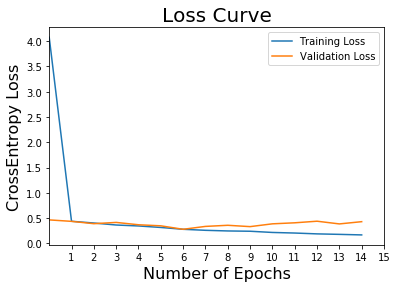

In [87]:
df2["Training loss"].head(15).plot(label= 'Training Loss')
df2["Validation loss"].head(15).plot(label = 'Validation Loss')
plt.title('Loss Curve', fontsize = 20)
plt.xlabel('Number of Epochs', fontsize = 16)
plt.ylabel('CrossEntropy Loss', fontsize = 16)
plt.xticks(np.arange(1,16,step = 1))
plt.legend()
plt.show()

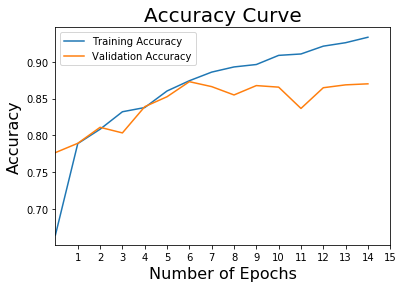

In [85]:
df2["Training Accuracy"].head(15).plot(label='Training Accuracy')
df2["Validation Accuracy"].head(15).plot(label = 'Validation Accuracy')
plt.title('Accuracy Curve', fontsize=20)
plt.xlabel('Number of Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.xticks(np.arange(1,16,step = 1))
plt.legend()
plt.show()